**Car Accident Severity Prediction**

*_Capstone Project_*

In [58]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#Getting the Data using Kaggle API #For information on how to import, please go to: https://medium.com/@jeff.daniel77/accessing-the-kaggle-com-api-with-jupyter-notebook-on-windows-d6f330bc6953
!kaggle datasets download -d sobhanmoosavi/us-accidents
print("Zip File Downloaded!")

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)Zip File Downloaded!



In [3]:
#Unzip the file
import zipfile
with zipfile.ZipFile("us-accidents.zip","r") as zip_ref:
    zip_ref.extractall("")
print("Data Extracted!")

Data Extracted!


In [4]:
#First Look at the data
df = pd.read_csv("US_Accidents_June20.csv")
data = df
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


**Exploratory Data Analysis**

In [5]:
print(data.columns)
print(data.shape)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
(3513617, 49)


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TMC,2478818.0,208.022581,20.766272,200.000000,201.000000,201.000000,201.000000,4.060000e+02
Severity,3513617.0,2.339929,0.552193,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,3513617.0,36.541945,4.883520,24.555269,33.637840,35.916870,40.322170,4.900220e+01
Start_Lng,3513617.0,-95.791512,17.368772,-124.623833,-117.441765,-91.026009,-80.932991,-6.711317e+01
End_Lat,1034799.0,37.557578,4.861215,24.570110,33.994772,37.797358,41.051391,4.907500e+01
End_Lng,1034799.0,-100.455981,18.528793,-124.497829,-118.343992,-97.034380,-82.101678,-6.710924e+01
Distance(mi),3513617.0,0.281617,1.550134,0.000000,0.000000,0.000000,0.010000,3.336300e+02
Number,1250753.0,5975.382688,14966.240165,0.000000,864.000000,2798.000000,7098.000000,9.999997e+06
Temperature(F),3447885.0,61.935119,18.621057,-89.000000,50.000000,64.000000,75.900000,1.706000e+02
Wind_Chill(F),1645368.0,53.557295,23.773337,-89.000000,35.700000,57.000000,72.000000,1.150000e+02


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
#Filling out missing values
lst = ['Humidity(%)','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)']
for l in lst:
    data[l] = data[l].fillna(0)

In [9]:
lst = ['Temperature(F)','Pressure(in)']
for l in lst:
    data[l]=data[l].fillna(data[l].mean())

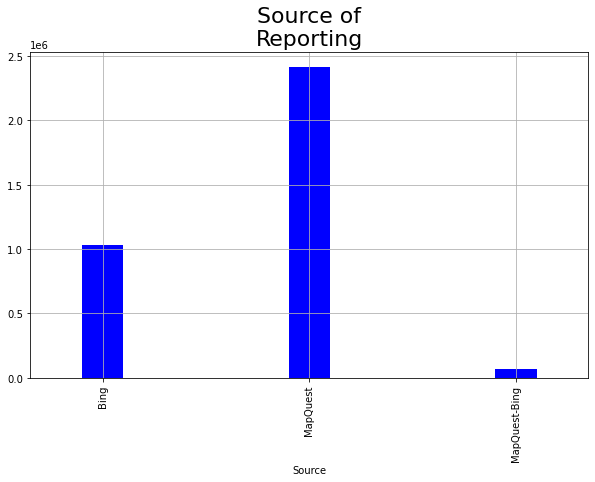

In [10]:
data['Source'].unique()
fig, ax = plt.subplots(figsize=(10,6))
data.groupby('Source').size().plot(kind = 'bar', 
                                 color = 'blue',
                                 linewidth = 0.8,
                                 width = 0.2,
                                 align = 'center',grid="True")
ax.set_title('Source of\nReporting', fontsize=22);

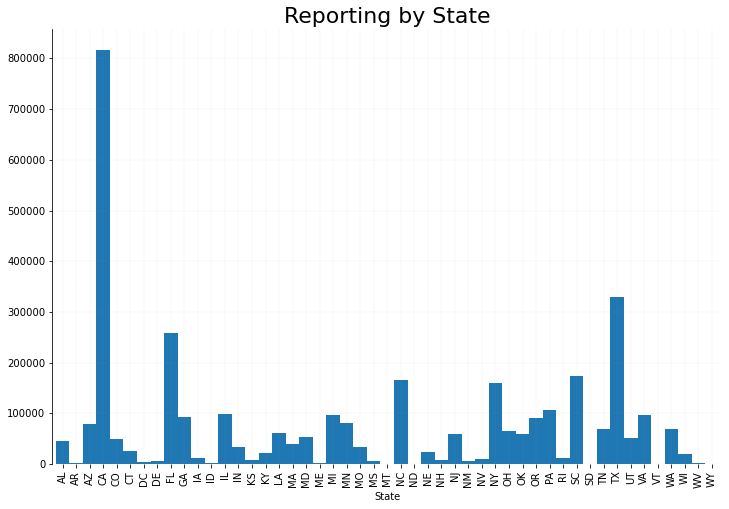

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
data.groupby('State').size().plot(kind = 'bar',
                                 linewidth = 0.8,
                                 width = 1,
                                 align = 'center')
ax.set_title('Reporting by State', fontsize=22)
ax.grid(linestyle=':', linewidth = '0.2')
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);

In [12]:
data.groupby('Severity').size()

Severity
1      29174
2    2373210
3     998913
4     112320
dtype: int64

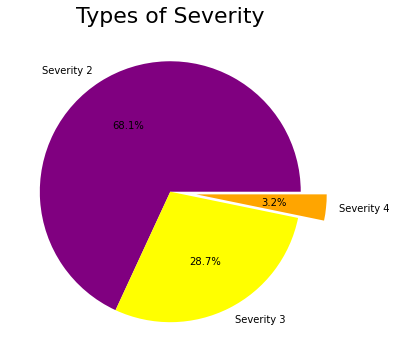

In [13]:
df_sev = df.groupby('Severity').size()
df_sev = df_sev[[2,3,4]]
cols = ['purple', 'yellow', 'orange']
cases = ['Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(df_sev,
        colors = cols,
        labels= cases,
        explode = (0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Types of Severity', fontsize=22);

In [15]:
df['Count'] = 1
w = data.groupby(['State'])['Count'].sum().reset_index()

In [16]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

In [51]:
n = folium.Map(location=[39.381266, -97.922211],zoom_start=4, max_zoom = 4,min_zoom = 4, zoom_control = False)
folium.Choropleth(
 geo_data=state_geo,
 data=w,
 columns=['State', 'Count'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=2,
 line_opacity=1,zoom_start=3,
 legend_name='Accidents' 
).add_to(n)
n

**Regression Analysis**

In [59]:
variable = ["Severity","Distance(mi)","Temperature(F)","Wind_Chill(F)","Humidity(%)",
           "Pressure(in)","Visibility(mi)","Wind_Speed(mph)","Precipitation(in)"]
accident_model = data[variable]
accident_model.head()
Y = accident_model.loc[:,'Severity'].values
X = accident_model.loc[:,'Distance(mi)':'Precipitation(in)'].values

standardized_X = preprocessing.scale(X)
train_x, test_x, train_y, test_y = train_test_split(standardized_X,Y , test_size=0.3, random_state=0)

model = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=1000)
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [60]:
model.score(test_x, test_y)

0.677706562842121

Text(91.68, 0.5, 'true value')

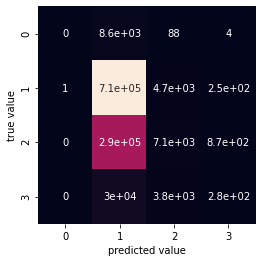

In [61]:
model_y = model.predict(test_x)

mat = confusion_matrix(test_y,model_y)
sns.heatmap(mat, square=True, annot=True, cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')